In [1]:
psrname='J0751+1807'

In [2]:
spna_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/'+psrname+'/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNTA/'+psrname+'/results/'

In [3]:
import os
with os.scandir(spna_dir) as entries:
        for entry in entries:
            spna_dir=spna_dir+entry.name+'/ptmcmc/'

In [4]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir/')
from diff_chain import  Diff_chain_shift

2023-03-26 19:45:50.634143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 19:45:50.682199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 19:45:50.683189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 19:45:51.421103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
einpta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_einpta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_einpta_spna)
einpta_spna_2=einpta_spna_1.T

In [6]:
einpta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_einpta_spnta)
einpta_spnta_2=einpta_spnta_1.T

# Tension considering dm noise only

In [7]:
spna_arr_dm=[einpta_spna_2[lspn-1],einpta_spna_2[lspn-2]]

spnta_arr_dm=[einpta_spnta_2[lspnt-2],einpta_spnta_2[lspnt-1]]

In [8]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [9]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=einpta_spna_2[-3],names=names_dm,labels=labels_dm,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=einpta_spnta_2[-1],names = names_dm,labels=labels_dm,label='SPNTA \n'+psrname)

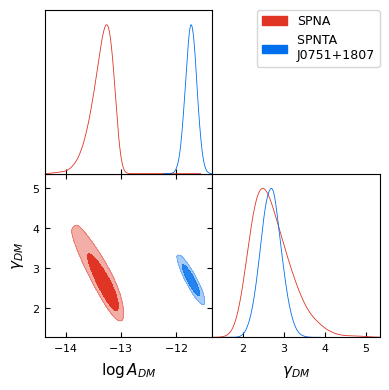

In [10]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_dm.png',dpi=300)
plt.show()

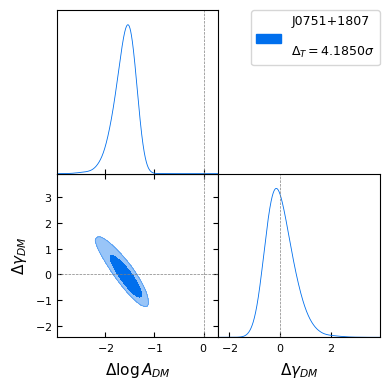

In [11]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)